In [3]:
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import numpy as np

In [4]:
def minmax(x,min,max, reverse=False):
    if reverse:
        return(x*(max-min)+min)
    return (x-min)/(max-min)

def mapminmax(array, min_max=None, reverse=False):
    if(min_max and reverse):
        (min,max) = min_max
        vminmax = np.vectorize(minmax)
        return vminmax(array,min,max,True)
    min = np.min(array)
    max = np.max(array)
    vminmax = np.vectorize(minmax)
    return (vminmax(array,min,max),min,max)

def vminmax(vector, min_max=None, reverse=False):
    norm = []
    (min,max) = min_max
    for n in vector:
        norm.append(minmax(n,min,max,reverse))
    return np.array(norm)


In [5]:
class net():
    def __init__(self, weights, function, function_prime):
        self.W=weights
        self.function = function
        self.function_prime = function_prime
        self.grad=None
        self.a = []
        self.z = []    
    
    def eval(self,x):
        self.a0_ = np.vstack((x, (np.ones((1,x.shape[1])))))
        self.z1 = np.dot(self.W[0], self.a0_)
        a1 = self.function[0](self.z1)
        self.a1_ = np.vstack((a1, (np.ones((1,a1.shape[1])))))
        self.z2 = np.dot(self.W[1], self.a1_)
        a2 = self.function[1](self.z2)
        return a2

def error(targets, y):
    pass

def traingd(net, e):
    eta = 0.001
    deltaL2 = np.multiply(-2*net.function_prime[1](net.z2),e)
    DW21 = -eta*np.dot(deltaL2, net.a1_.T)
    net.W[1] = np.add(net.W[1],DW21)
    W21 = np.delete(net.W[1],np.s_[-1:], axis=1)
    deltaL1 = np.multiply (net.function_prime[0](net.z1),np.dot(W21.T,deltaL2))
    DW10 = -eta*np.dot(deltaL1, net.a0_.T)
    net.W[0] = np.add(net.W[0],DW10)
    
def traingdm(net, e):
    if(not net.grad):
        net.grad = len(net.W)*[0]
    
    deltaL2 = np.multiply(-2*net.function_prime[1](net.z2),e)
    DW21 = net.eta*np.dot(deltaL2, net.a1_.T)
    net.grad[1] = net.gamma*net.grad[1] + DW21
    net.W[1] = np.subtract(net.W[1],net.grad[1])
        
    W21 = np.delete(net.W[1],np.s_[-1:], axis=1)
    deltaL1 = np.multiply (net.function_prime[0](net.z1),np.dot(W21.T,deltaL2))
    DW10 = net.eta*np.dot(deltaL1, net.a0_.T)
    net.grad[0] = net.gamma*net.grad[0] + DW10
    net.W[0] = np.subtract(net.W[0],net.grad[0])



In [6]:
from decimal import Decimal


def tanh_prime(x):
    return 1-np.power(np.tanh(x),2)


def test_net(optimizer, train_data, test_data=None, max_epoch = 1000):

    inputs = train_data['input']
    targets = train_data['target']
    (inputs,imin, imax) = mapminmax(inputs)
    (targets,tmin, tmax) = mapminmax(targets)

    if test_data:
        testinputs = test_data['input']
        testtargets = test_data['target']
        (testinputs,testimin, testimax) = mapminmax(testinputs)
        (testtargets,testtmin, testtmax) = mapminmax(testtargets)

    
    N0 = inputs.shape[1]
    N1 = 3
    N2 = targets.shape[1]

    test_error = []
    max_models = 10
    i=0
    epoch = 0
    error_evolution=[]
    W10 = np.random.uniform(-.5,.5,(N1, N0))
    W10_ = np.hstack((W10, (np.ones((N1,1)))))

    W21 = np.random.uniform(-.5,.5,(N2, N1))
    W21_ = np.hstack((W21, (np.ones((N2,1)))))

    W =  [W10_, W21_]
    functions=[np.tanh, np.tanh]
    function_prime=[tanh_prime, tanh_prime]
    model = net(W, functions, function_prime) #net instance
    while epoch<max_epoch:
        y_pred = model.eval(inputs.T) #output
        e = np.subtract(targets.T, y_pred) #error
        E = np.power(e,2) #Loss
        error_evolution.append(np.sum(E))
        optimizer(model, e)
        if test_data:
            y_pred = model.eval(testinputs.T) #output
            test_e = np.subtract(testtargets.T, y_pred) #error
            test_E = np.power(test_e,2) #Loss
            test_error.append(np.sum(test_E))
        if epoch%20==0:
            print("Error: {:.2e}, epoch {}".format(Decimal(np.sum(E)),epoch))
        epoch = epoch + 1
    if test_data:
        return (model,error_evolution, test_error)
    return (model,error_evolution)





In [7]:
inputs = np.array([[4.7,6.0],
      [6.1,3.9],
      [2.9,4.2],
      [7.0,5.5]])
targets = np.array([[3.52,4.02],    
      [5.43,6.23],
      [4.95,5.76],
      [4.70,4.28]])
train_data = {'input':inputs, 'target':targets}

_,err_gd = test_net(traingd, train_data)

Error: 1.22e+0, epoch 0
Error: 1.16e+0, epoch 20
Error: 1.11e+0, epoch 40
Error: 1.07e+0, epoch 60
Error: 1.03e+0, epoch 80
Error: 1.00e+0, epoch 100
Error: 9.78e-1, epoch 120
Error: 9.54e-1, epoch 140
Error: 9.33e-1, epoch 160
Error: 9.14e-1, epoch 180
Error: 8.97e-1, epoch 200
Error: 8.82e-1, epoch 220
Error: 8.69e-1, epoch 240
Error: 8.58e-1, epoch 260
Error: 8.49e-1, epoch 280
Error: 8.42e-1, epoch 300
Error: 8.36e-1, epoch 320
Error: 8.31e-1, epoch 340
Error: 8.27e-1, epoch 360
Error: 8.24e-1, epoch 380
Error: 8.22e-1, epoch 400
Error: 8.19e-1, epoch 420
Error: 8.18e-1, epoch 440
Error: 8.16e-1, epoch 460
Error: 8.15e-1, epoch 480
Error: 8.14e-1, epoch 500
Error: 8.12e-1, epoch 520
Error: 8.11e-1, epoch 540
Error: 8.10e-1, epoch 560
Error: 8.10e-1, epoch 580
Error: 8.09e-1, epoch 600
Error: 8.08e-1, epoch 620
Error: 8.07e-1, epoch 640
Error: 8.06e-1, epoch 660
Error: 8.05e-1, epoch 680
Error: 8.04e-1, epoch 700
Error: 8.04e-1, epoch 720
Error: 8.03e-1, epoch 740
Error: 8.02e-1, ep

<IPython.core.display.Javascript object>


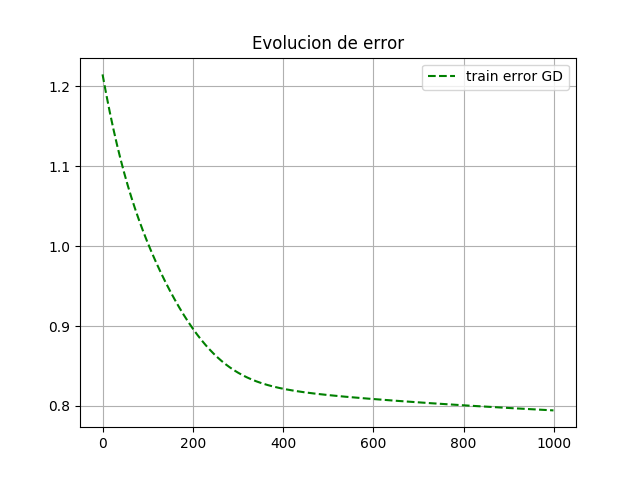

In [8]:
plt.figure()
plt.title('Evolucion de error')
x = range(len(err_gd))
line1, = plt.plot(x, err_gd,'g--',label='train error GD')
legend = plt.legend(handles=[line1])
plt.grid(True)
plt.show()